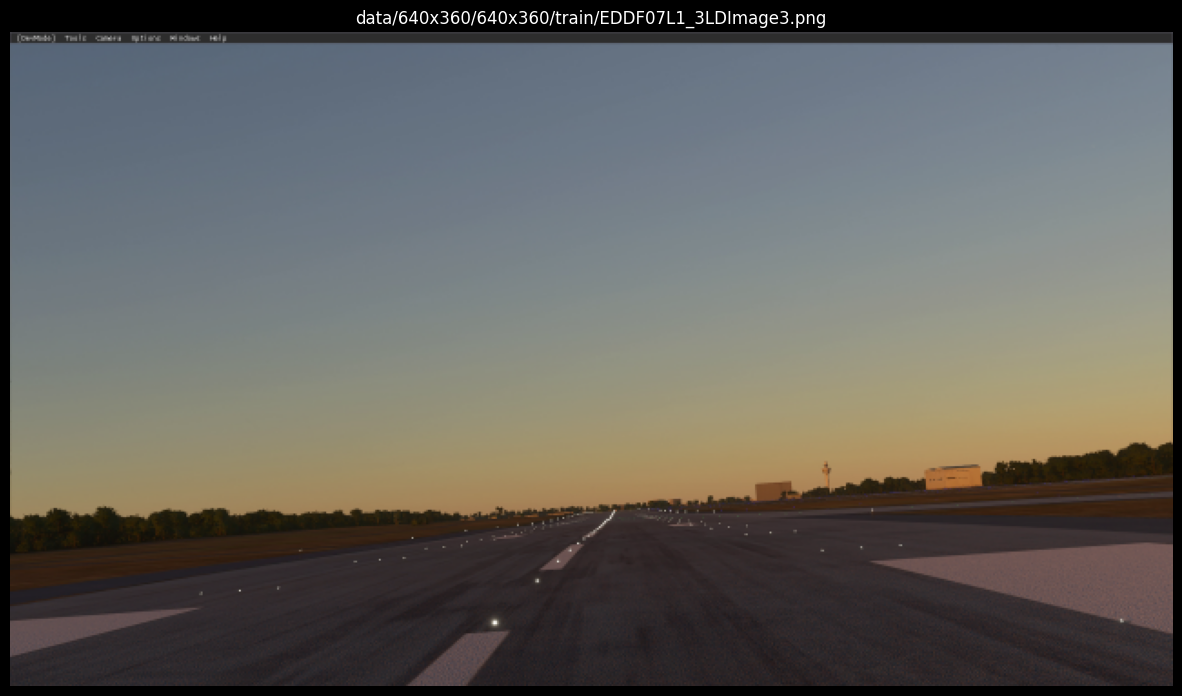

In [24]:
#Look at images
from pathlib import Path
from PIL import Image
import random
import matplotlib.pyplot as plt
from mpmath.identification import transforms
from torchvision.ops.misc import interpolate

random.seed(42)
target_dir_feature = Path('data/640x360/640x360')

if target_dir.exists():
    train_dir = target_dir_feature/'train'
    test_dir = target_dir_feature/'test'
    image_path_feature_list = list(train_dir.glob('*.png'))

    if len(image_path_feature_list)>0:

        random_image_path = random.choice(image_path_feature_list)
        image = Image.open(random_image_path)

        plt.figure(figsize=(15,15))
        plt.imshow(image)
        plt.title(random_image_path)
        plt.axis('off')
        plt.show()

    else:
        print(f'No images found in  {train_dir}')

else:
    print('Directory not found')

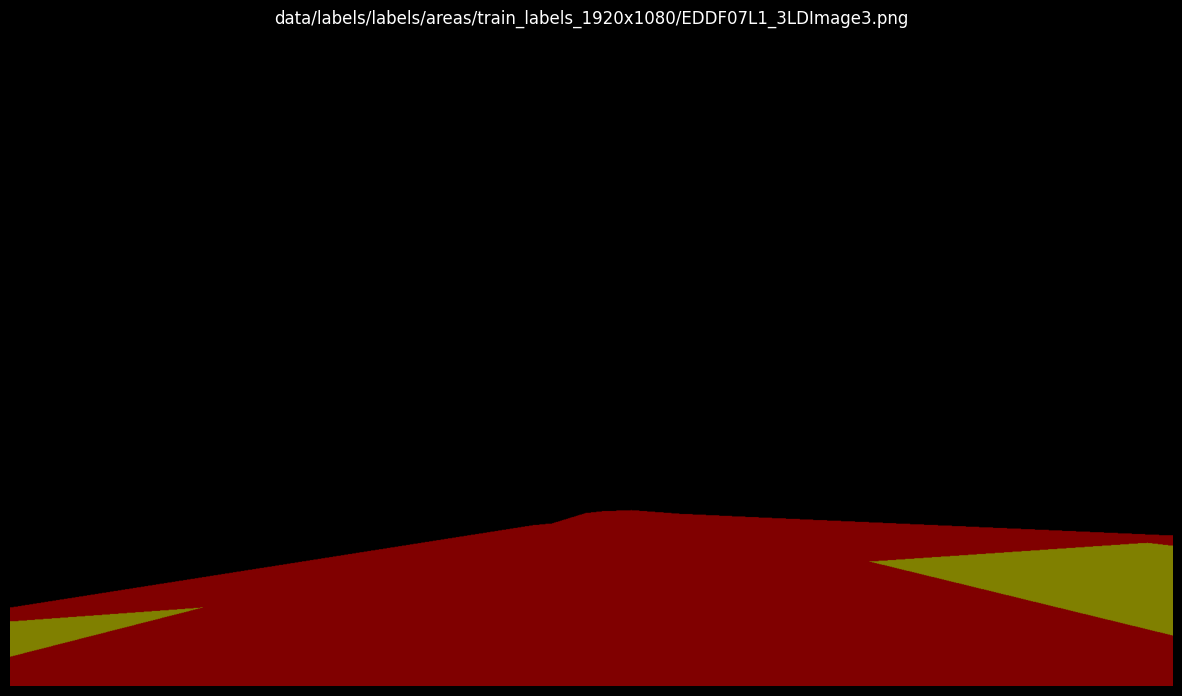

In [28]:
#look at the label masks
target_dir_labels = Path('data/labels/labels/areas/')

random.seed(42)
if target_dir_labels.exists():
    train_labels_dir = target_dir_labels/'train_labels_1920x1080/'
    test_labels_dir = target_dir_labels/'test_labels_1920x1080/'

    image_mask_list = list(train_labels_dir.glob('*.png'))
    if len(image_mask_list)>0:
        random_image_mask_path = random.choice(image_mask_list)
        image_mask = Image.open(random_image_mask_path)

        plt.figure(figsize=(15,15))
        plt.imshow(image_mask)
        plt.title(random_image_mask_path)
        plt.axis('off')
        plt.show()

    else:
        print(f'No images found in  {train_dir_labels}')
else:
    print('Directory not found')

In [30]:
#set device agnostics
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [55]:
#TRransforms images as well masks
from torchvision import transforms,datasets

image_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(brightness=[max(0, 1 - 0.2), 1 + 0.2],
                           contrast=[max(0, 1 - 0.2), 1 + 0.2],
                           saturation=[max(0, 1 - 0.2), 1 + 0.2],
                           hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),

])

mask_transform = transforms.Compose([
    transforms.Resize(256,interpolation=transforms.InterpolationMode.NEAREST),
    transforms.PILToTensor(),
])

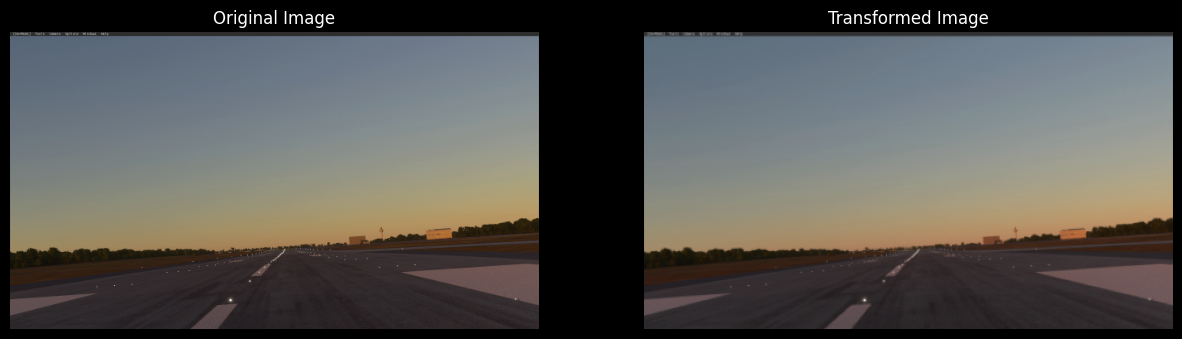

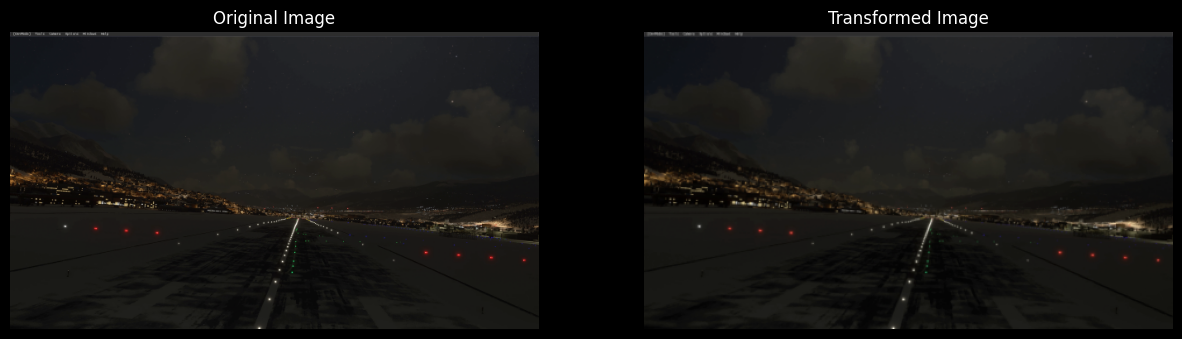

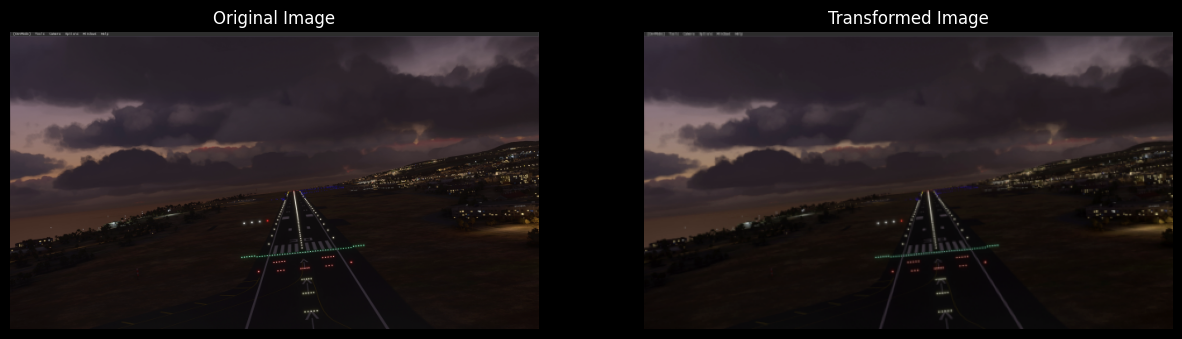

In [51]:
#View Transformed images
random.seed(42)

random_image_path = random.sample(image_path_feature_list,3)

for image_path in random_image_path:
    with Image.open(image_path) as img:
        fig,ax = plt.subplots(1,2, figsize=(15,15))

        ax[0].imshow(img)
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        transformed_img = image_transform(img).permute(1, 2, 0)

        ax[1].imshow(transformed_img)
        ax[1].set_title('Transformed Image')
        ax[1].axis('off')

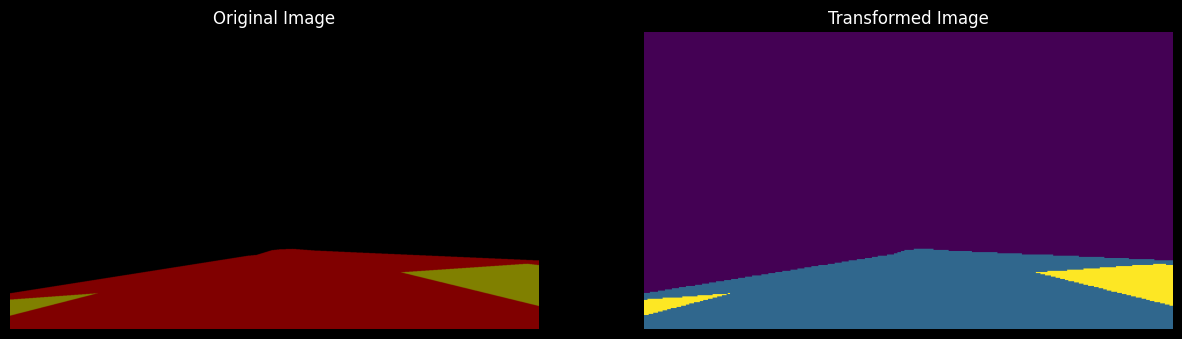

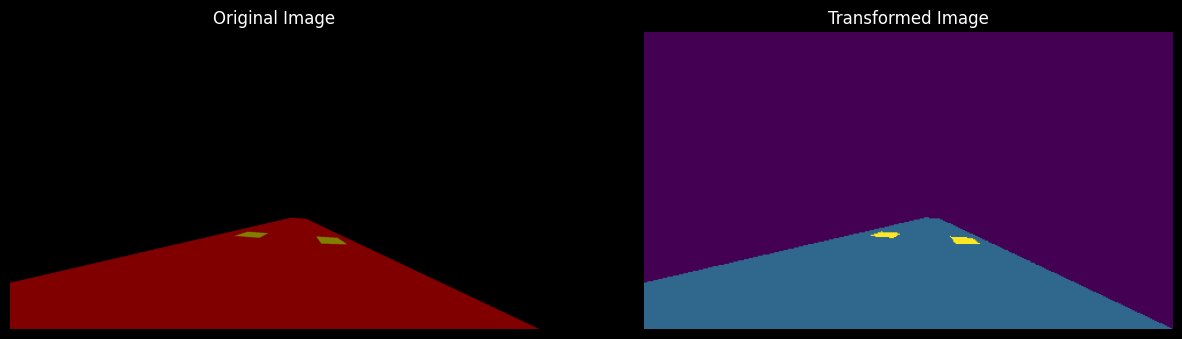

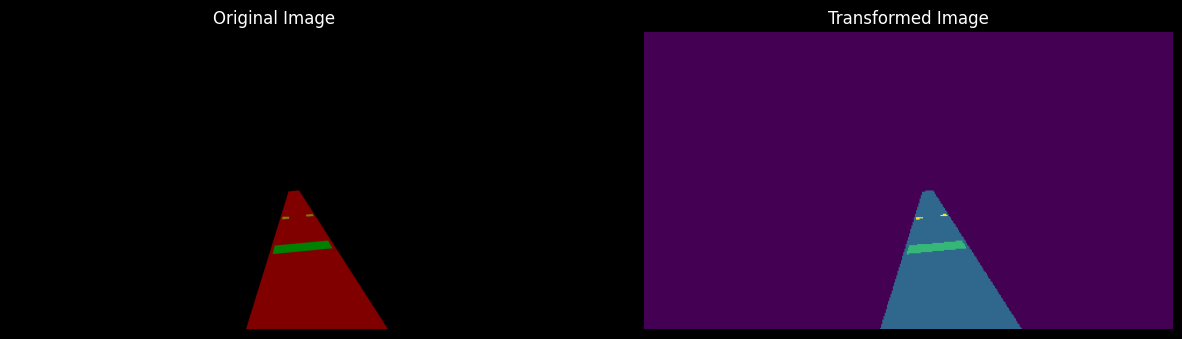

In [56]:
#View Transformed labels
random.seed(42)

random_mask_path = random.sample(image_mask_list,3)

for image_path in random_mask_path:
    with Image.open(image_path) as img:
        fig,ax = plt.subplots(1,2, figsize=(15,15))

        ax[0].imshow(img)
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        transformed_img = mask_transform(img).permute(1, 2, 0)

        ax[1].imshow(transformed_img)
        ax[1].set_title('Transformed Image')
        ax[1].axis('off')